In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
datos = pd.read_csv("casasboston.csv")

In [ ]:
print(datos)

           TOWN      LON      LAT  MEDV     CRIM    ZN  INDUS  CHAS    NOX  \
0        Nahant -70.9550  42.2550  24.0  0.00632  18.0   2.31     0  0.538   
1    Swampscott -70.9500  42.2875  21.6  0.02731   0.0   7.07     0  0.469   
2    Swampscott -70.9360  42.2830  34.7  0.02729   0.0   7.07     0  0.469   
3    Marblehead -70.9280  42.2930  33.4  0.03237   0.0   2.18     0  0.458   
4    Marblehead -70.9220  42.2980  36.2  0.06905   0.0   2.18     0  0.458   
..          ...      ...      ...   ...      ...   ...    ...   ...    ...   
501    Winthrop -70.9860  42.2312  22.4  0.06263   0.0  11.93     0  0.573   
502    Winthrop -70.9910  42.2275  20.6  0.04527   0.0  11.93     0  0.573   
503    Winthrop -70.9948  42.2260  23.9  0.06076   0.0  11.93     0  0.573   
504    Winthrop -70.9875  42.2240  22.0  0.10959   0.0  11.93     0  0.573   
505    Winthrop -70.9825  42.2210  19.0  0.04741   0.0  11.93     0  0.573   

        RM   AGE     DIS  RAD  TAX  PTRATIO       B  LSTAT  
0 

In [ ]:
df = datos[["RM","CRIM","MEDV","TOWN","CHAS"]]

In [ ]:
df=datos.rename(columns={
    "TOWN":"CIUDAD",
    "CRIM":"INDICE_CRIMEN",
    "INDUS":"PCT_ZONA_INDUSTRIAL",
    "CHAS": "RIO CHARLES",
    "RM": "N_HABITACIONES_MEDIO",
    "MEDV": "VALOR_MEDIANO",
    "LSTAT": "PCT_CLASE_BAJA"
})

In [ ]:
print(df)

         CIUDAD      LON      LAT  VALOR_MEDIANO  INDICE_CRIMEN    ZN  \
0        Nahant -70.9550  42.2550           24.0        0.00632  18.0   
1    Swampscott -70.9500  42.2875           21.6        0.02731   0.0   
2    Swampscott -70.9360  42.2830           34.7        0.02729   0.0   
3    Marblehead -70.9280  42.2930           33.4        0.03237   0.0   
4    Marblehead -70.9220  42.2980           36.2        0.06905   0.0   
..          ...      ...      ...            ...            ...   ...   
501    Winthrop -70.9860  42.2312           22.4        0.06263   0.0   
502    Winthrop -70.9910  42.2275           20.6        0.04527   0.0   
503    Winthrop -70.9948  42.2260           23.9        0.06076   0.0   
504    Winthrop -70.9875  42.2240           22.0        0.10959   0.0   
505    Winthrop -70.9825  42.2210           19.0        0.04741   0.0   

     PCT_ZONA_INDUSTRIAL  RIO CHARLES    NOX  N_HABITACIONES_MEDIO   AGE  \
0                   2.31            0  0.538   

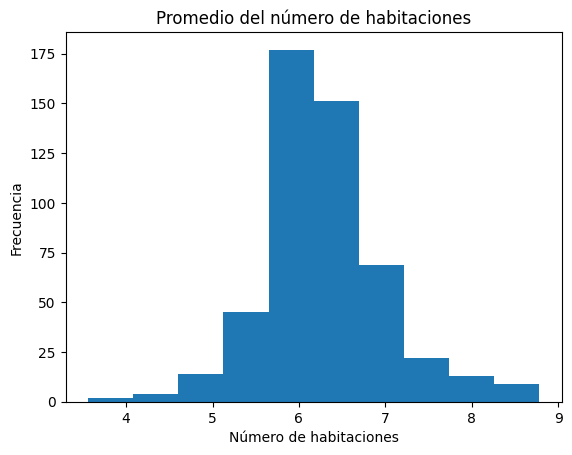

In [ ]:
df.N_HABITACIONES_MEDIO.plot.hist()
# Agregar título al gráfico
plt.title('Promedio del número de habitaciones')
plt.xlabel('Número de habitaciones')
plt.ylabel('Frecuencia')
plt.show()

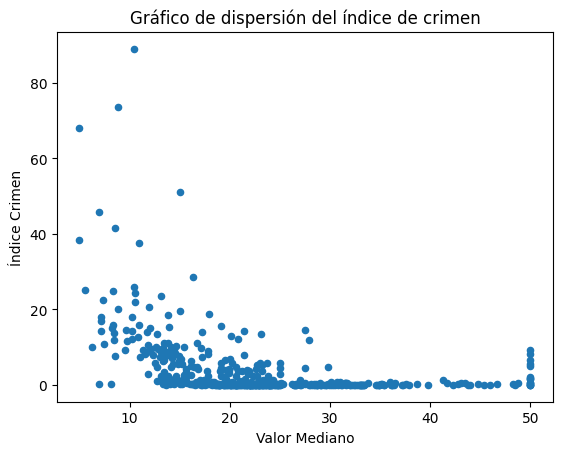

In [ ]:
df.plot.scatter(x="VALOR_MEDIANO", y="INDICE_CRIMEN",alpha=1)
plt.title('Gráfico de dispersión del índice de crimen')
plt.xlabel('Valor Mediano')
plt.ylabel('Índice Crimen')
plt.show()

In [ ]:
valor_por_ciudad=df.groupby("CIUDAD")["VALOR_MEDIANO"].mean()

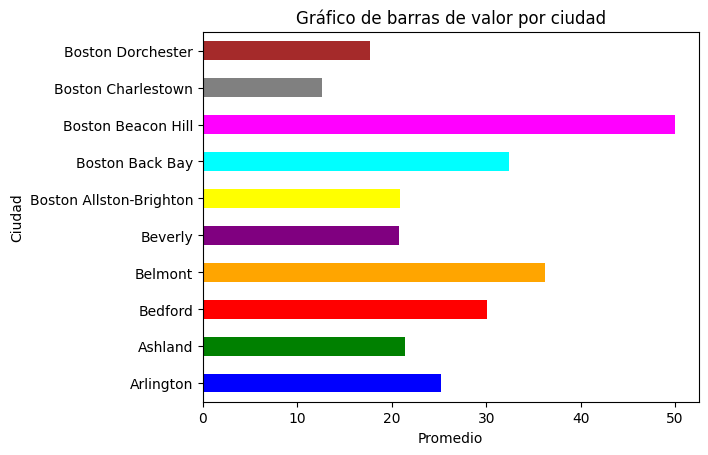

In [ ]:
colores = ['blue', 'green', 'red', 'orange', 'purple', 'yellow', 'cyan', 'magenta', 'gray', 'brown']

valor_por_ciudad.head(10).plot.barh(color=colores)
plt.title("Gráfico de barras de valor por ciudad")
plt.xlabel('Promedio')
plt.ylabel('Ciudad')
plt.show()

In [ ]:
import seaborn as sns #Otra libería para graficacion

In [ ]:
table = pd.crosstab(df['INDICE_CRIMEN'], df['VALOR_MEDIANO'])
#el contenido de la tabla por celda será la cantidad de observaciones que cumpla
#con el criterio del encabezado de fila y columna

In [ ]:
print(table)

VALOR_MEDIANO  5.0   5.6   6.3   7.0   7.2   7.4   7.5   8.1   8.2   8.3   \
INDICE_CRIMEN                                                               
0.00632           0     0     0     0     0     0     0     0     0     0   
0.00906           0     0     0     0     0     0     0     0     0     0   
0.01096           0     0     0     0     0     0     0     0     0     0   
0.01301           0     0     0     0     0     0     0     0     0     0   
0.01311           0     0     0     0     0     0     0     0     0     0   
...             ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
45.74610          0     0     0     1     0     0     0     0     0     0   
51.13580          0     0     0     0     0     0     0     0     0     0   
67.92080          1     0     0     0     0     0     0     0     0     0   
73.53410          0     0     0     0     0     0     0     0     0     0   
88.97620          0     0     0     0     0     0     0     0     0     0   

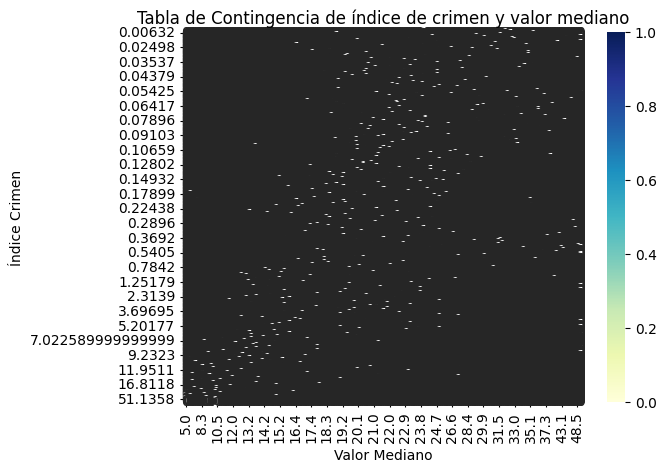

In [ ]:
# Graficar la tabla de contingencia con seaborn
sns.heatmap(table, annot=True, fmt='d', cmap='YlGnBu')

# Añadir título
plt.title('Tabla de Contingencia de índice de crimen y valor mediano')
plt.xlabel('Valor Mediano')
plt.ylabel('Índice Crimen')
# Mostrar el gráfico
plt.show()